# Install Respective Libraries

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 5.0 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Convert to Grey scale

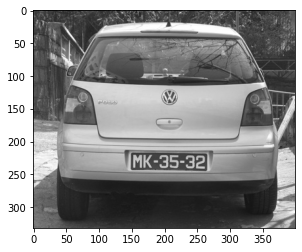

In [ ]:
img = cv2.imread('/content/Cars116.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #matplotlib takes the image input in form of RGB only

# Apply Filter and edge detection

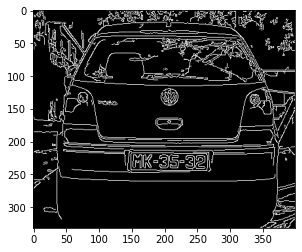

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge Detection , numpy array  
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Find Contours and apply masks

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints) 
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
location = None
for i in contours:
  approx = cv2.approxPolyDP(i, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[149, 219]],

       [[263, 218]],

       [[266, 240]],

       [[151, 243]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask = mask)

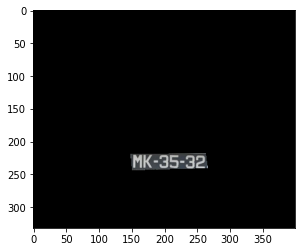

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

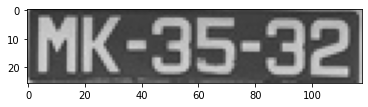

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Apply easyOCR to read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [118, 0], [118, 26], [0, 26]], 'MK-35-32', 0.9998827867687982)]

# Place the result on the image

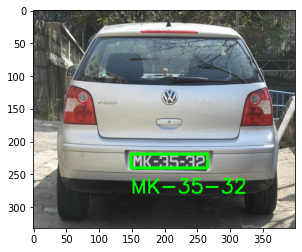

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color=(0,255,0), thickness = 2)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))